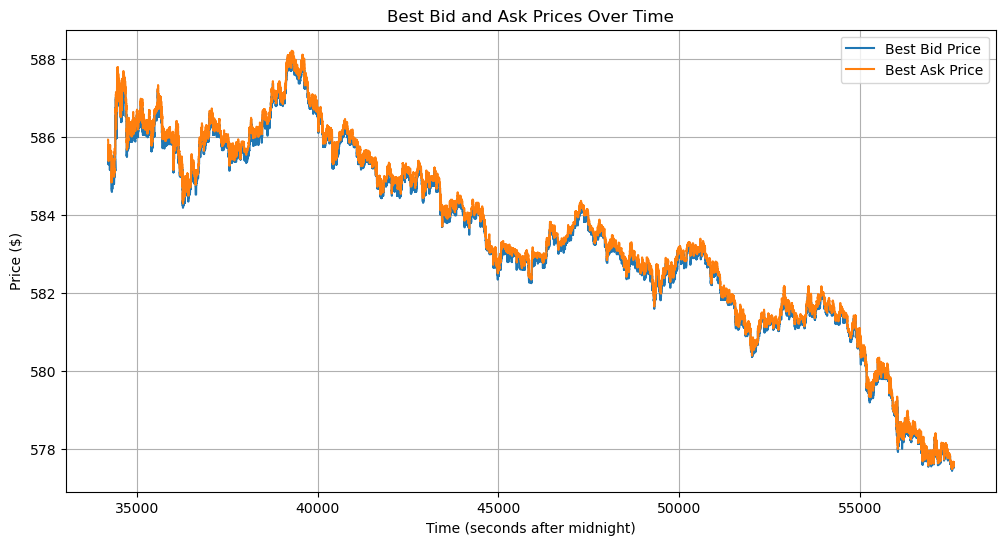

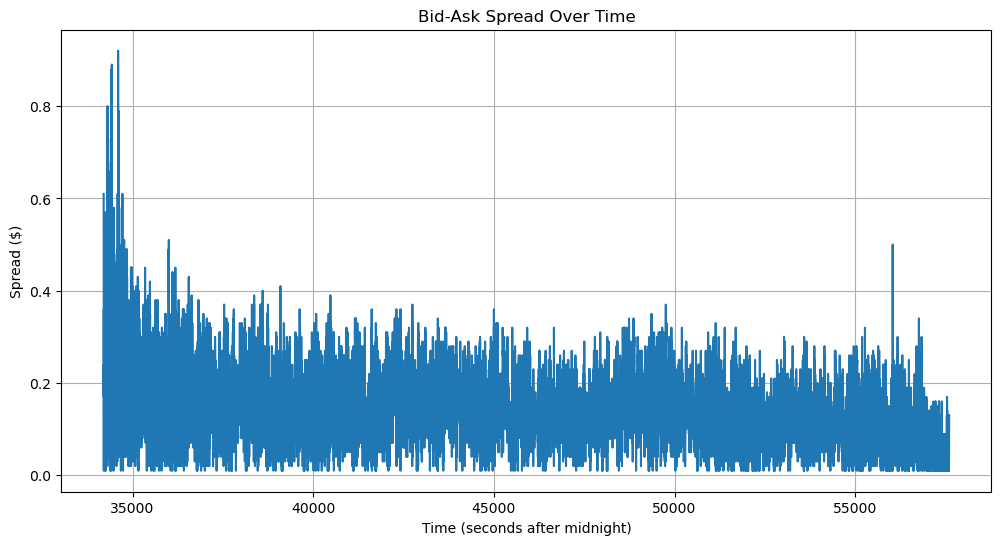

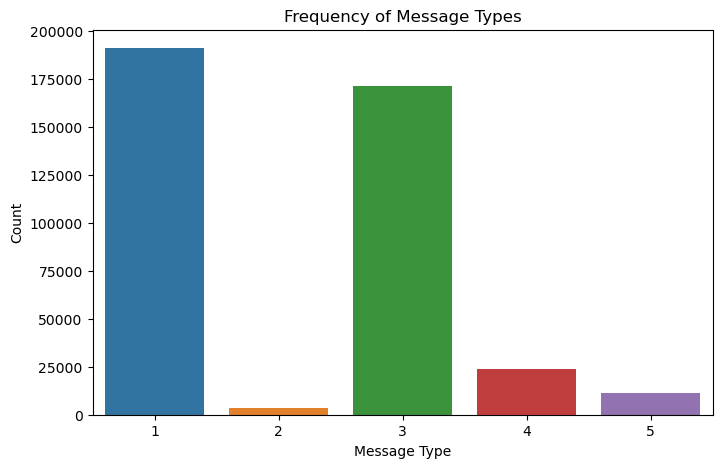

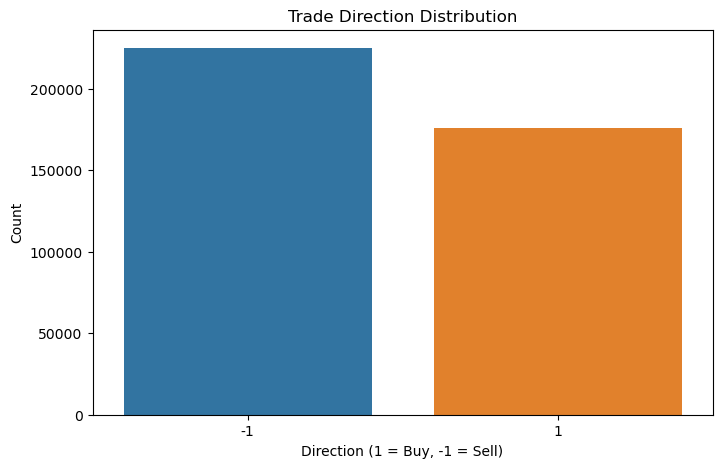

In [1]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

message_df = pd.read_csv("AAPL_2012-06-21_34200000_57600000_message_10.csv", header=None)
orderbook_df = pd.read_csv("AAPL_2012-06-21_34200000_57600000_orderbook_10.csv", header=None)

message_df.columns = ["Time", "Type", "OrderID", "Size", "Price", "Direction"]

# 🏷️ Name columns in order book file
num_levels = int(orderbook_df.shape[1] / 4)
orderbook_cols = []
for level in range(1, num_levels + 1):
    orderbook_cols.extend([
        f"AskPrice{level}", f"AskSize{level}",
        f"BidPrice{level}", f"BidSize{level}"
    ])
orderbook_df.columns = orderbook_cols



plt.figure(figsize=(12,6))
plt.plot(message_df["Time"], orderbook_df["BidPrice1"] / 10000, label="Best Bid Price")
plt.plot(message_df["Time"], orderbook_df["AskPrice1"] / 10000, label="Best Ask Price")
plt.xlabel("Time (seconds after midnight)")
plt.ylabel("Price ($)")
plt.title("Best Bid and Ask Prices Over Time")
plt.legend()
plt.grid(True)
plt.show()



spread = (orderbook_df["AskPrice1"] - orderbook_df["BidPrice1"]) / 10000
plt.figure(figsize=(12,6))
plt.plot(message_df["Time"], spread)
plt.xlabel("Time (seconds after midnight)")
plt.ylabel("Spread ($)")
plt.title("Bid-Ask Spread Over Time")
plt.grid(True)
plt.show()




plt.figure(figsize=(8,5))
sns.countplot(x="Type", data=message_df)
plt.title("Frequency of Message Types")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()


plt.figure(figsize=(8,5))
sns.countplot(x="Direction", data=message_df)
plt.title("Trade Direction Distribution")
plt.xlabel("Direction (1 = Buy, -1 = Sell)")
plt.ylabel("Count")
plt.show()
